In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras

# Raw data

In [155]:
N=5000
no=5
N_test = 15000

In [4]:
df_1 = pd.read_csv("E:\Project\Human Identity\Data\Accelerometer_User_1_34756.csv")
df_1

,ID,TIMESTAMP,X,Y,Z
0,1.598620e+12,0,-1.648392,1.135391,9.789062
1,1.598620e+12,1,-1.703430,1.152145,10.018768
2,1.598620e+12,2,-1.380402,1.264603,9.743591
3,1.598620e+12,3,-1.279907,1.211960,9.707703
4,1.598620e+12,4,-1.447403,1.073181,9.863235
...,...,...,...,...,...
34752,1.598620e+12,34752,-1.054977,1.056427,7.468018
34753,1.598620e+12,34753,-1.617294,1.125824,7.941803
34754,1.598620e+12,34754,-1.686691,0.920029,9.104706
34755,1.598620e+12,34755,-1.322967,0.850647,10.779678


In [5]:
df_1 = df_1.iloc[:N]

In [6]:
df_2 = pd.read_csv("E:\Project\Human Identity\Data\Accelerometer_User_2_36388.csv")
df_2

,ID,TIMESTAMP,X,Y,Z
0,1.599400e+12,0,-2.959233,3.189077,7.848193
1,1.599400e+12,1,-1.857901,2.896984,7.513005
2,1.599400e+12,2,-1.857901,2.896984,7.513005
3,1.599400e+12,3,-2.815581,2.839523,7.963115
4,1.599400e+12,4,-2.815581,2.839523,7.963115
...,...,...,...,...,...
36384,1.599400e+12,36384,-3.098097,6.057330,7.287950
36385,1.599400e+12,36385,-2.308010,6.675034,8.599973
36386,1.599400e+12,36386,-2.308010,6.675034,8.599973
36387,1.599400e+12,36387,-0.521936,8.901642,8.384495


In [7]:
df_2 = df_2.iloc[:N]

In [8]:
df_3 = pd.read_csv("E:\Project\Human Identity\Data\Accelerometer_User_3_85756.csv")
df_3

,ID,TIMESTAMP,X,Y,Z
0,1.600000e+12,0,-0.162857,2.018478,10.619858
1,1.600000e+12,1,-0.210709,2.269730,8.897034
2,1.600000e+12,2,-0.064743,2.858368,8.533325
3,1.600000e+12,3,0.074036,3.013901,9.071701
4,1.600000e+12,4,-0.007324,2.939713,9.222443
...,...,...,...,...,...
85752,1.600000e+12,85752,0.633957,2.298447,7.628830
85753,1.600000e+12,85753,-2.596359,4.703232,7.533112
85754,1.600000e+12,85754,-0.780197,3.822678,9.681870
85755,1.600000e+12,85755,0.088394,3.320175,10.784958


In [9]:
df_3 = df_3.iloc[:N]

In [10]:
df_4 = pd.read_csv("E:\Project\Human Identity\Data\Accelerometer_User_4_85857.csv")
df_4

,ID,TIMESTAMP,X,Y,Z
0,1.600260e+12,0,-1.674713,1.879562,9.676590
1,1.600260e+12,1,-1.988174,1.965698,9.573700
2,1.600260e+12,2,-1.595764,1.941772,9.829727
3,1.600260e+12,3,-1.346909,2.006378,10.126450
4,1.600260e+12,4,-1.468933,1.972885,9.987656
...,...,...,...,...,...
85853,1.600260e+12,85853,-0.507019,-10.766510,0.502518
85854,1.600260e+12,85854,-0.672134,-10.922043,0.294342
85855,1.600260e+12,85855,-1.043014,-10.534409,-0.014343
85856,1.600260e+12,85856,-1.169830,-10.441086,0.179474


In [11]:
df_4 = df_4.iloc[:N]

In [12]:
df_5 = pd.read_csv("E:\Project\Human Identity\Data\Accelerometer_User_5_63235.csv")
df_5

,ID,TIMESTAMP,X,Y,Z,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1.600000e+12,0,-2.240973,10.381259,-2.331953,NaN,NaN,NaN
1,1.600000e+12,1,2.791639,14.355634,-2.681506,NaN,NaN,NaN
2,1.600000e+12,2,2.619257,11.396400,-2.877830,NaN,NaN,NaN
3,1.600000e+12,3,-1.168370,7.671022,-0.718260,NaN,NaN,NaN
4,1.600000e+12,4,-1.824382,6.143522,0.330400,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
63232,1.600000e+12,35988,1.910573,10.213664,0.320823,NaN,NaN,NaN
63233,1.600000e+12,35989,0.569820,10.371682,0.799663,NaN,NaN,NaN
63234,1.600000e+12,35990,0.565032,10.759542,0.349553,NaN,NaN,NaN
63235,1.600000e+12,35991,1.412579,11.458650,-0.296881,NaN,NaN,NaN


In [13]:
df_5 = df_5.iloc[:N]

# Visualising the data

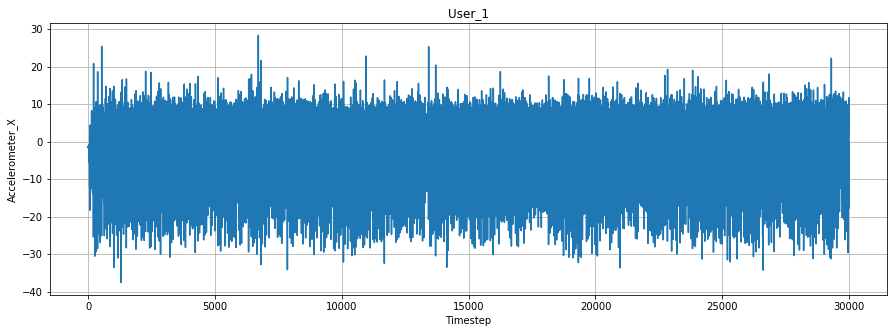

In [94]:
plt.plot(df_1.TIMESTAMP,df_1.X)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title("User_1")
plt.xlabel("Timestep")
plt.ylabel("Accelerometer_X")
plt.grid()

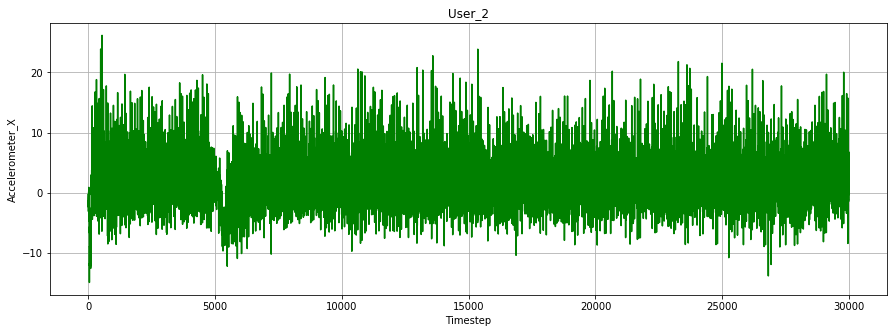

In [95]:
plt.plot(df_2.TIMESTAMP,df_2.X,c='green')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title("User_2")
plt.xlabel("Timestep")
plt.ylabel("Accelerometer_X")
plt.grid()

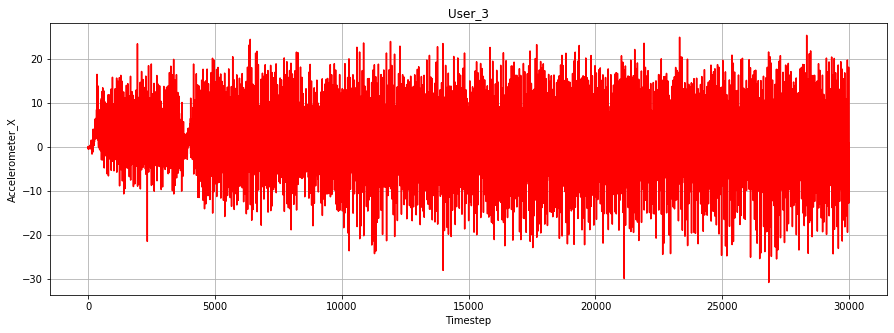

In [96]:
plt.plot(df_3.TIMESTAMP,df_3.X,c='r')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title("User_3")
plt.xlabel("Timestep")
plt.ylabel("Accelerometer_X")
plt.grid()

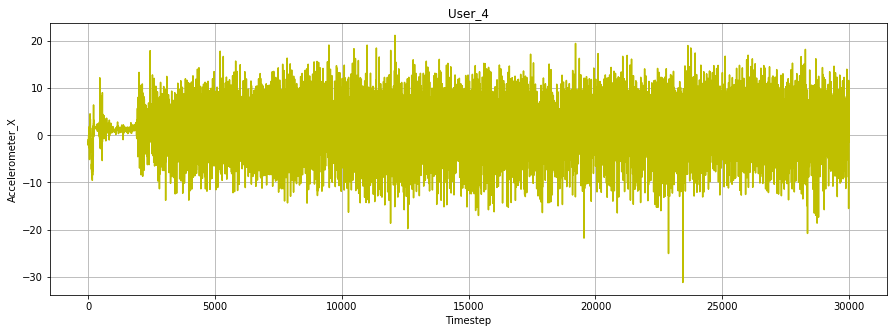

In [97]:
plt.plot(df_4.TIMESTAMP,df_4.X,c='y')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title("User_4")
plt.xlabel("Timestep")
plt.ylabel("Accelerometer_X")
plt.grid()

# Data Preprocessing

## Creating Windows 

In [21]:
# Main Algo for Creating Windows .....#1

def create(df,wind_size,hop_size):
  #l=((len(df.x)-wind_size)/hop_size)+1
  rows, cols = (wind_size, 3) 
  a = [[0 for i in range(cols)] for j in range(rows)] 
  array= [0 for i in range(int((len(df.X)-wind_size)/hop_size)+1)]
  k = 0
  for i in range(0,(len(df.X)-wind_size+1),hop_size):
      a=create1(df,i,wind_size)
       #array.append(a)
      array[k] = a
      k+=1
  #return pd.DataFrame(array)
  return array


In [22]:
# Main Algo for Creating Windows .....#2

def create1(df,x,w):
     rows = w 
     cols = 3
     
     arr = [[0 for i in range(cols)] for j in range(rows)] 
     for i in range(0,w,1):
        arr[i][0]=df["X"][x+i]
        arr[i][1]=df["Y"][x+i]
        arr[i][2]=df["Z"][x+i]
     return arr

In [16]:
data_user_1 = create(df_1,225,10)

In [17]:
data_user_2 = create(df_2,225,10)

In [18]:
data_user_3 = create(df_3,225,10)

In [19]:
data_user_4 = create(df_4,225,10)

In [20]:
data_user_5 = create(df_5,225,10)

In [29]:
samples=len(data_user_1)

## Creating Labels

In [30]:
y = []
for i in range(samples*no):
    if i < samples:
        y.append(0)
    elif i < samples*2 and i>=samples:
        y.append(1)
    elif i < samples*3 and i>=samples*2:
        y.append(2)
    elif i < samples*4 and i>=samples*3:
        y.append(3)
    else:
        y.append(4)
y = np.array(y)

## Concatenating the arrays

In [31]:
X = data_user_1+data_user_2+data_user_3+data_user_4+data_user_5
X = np.array(X)
X.shape

(2390, 225, 3)

## Splitting into training and testing

In [32]:
import sklearn
from sklearn.model_selection import train_test_split

In [33]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,shuffle=True)

# The Model

In [34]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout

Using TensorFlow backend.


In [91]:
clf = tensorflow.keras.Sequential()

In [92]:
clf.add(keras.layers.Conv2D(64, (3,3), activation= 'relu', input_shape = (225,3,1), padding='same'))
clf.add(keras.layers.Conv2D(32, (3,3), activation= 'relu',padding='same'))
clf.add(keras.layers.MaxPool2D(pool_size= (1,1)))
clf.add(keras.layers.Dropout(rate= 0.3))

clf.add(keras.layers.Conv2D(32, (3,3), activation= 'relu',padding='same'))
clf.add(keras.layers.Conv2D(16, (3,3), activation= 'relu',padding='same'))
clf.add(keras.layers.MaxPool2D(pool_size= (1,1)))
clf.add(keras.layers.Dropout(rate= 0.3))


clf.add(keras.layers.Flatten())
          
clf.add(keras.layers.Dense(128,activation='relu'))
clf.add(keras.layers.Dense(32,activation = 'relu'))
clf.add(keras.layers.Dense(5,activation='softmax'))

In [93]:
clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 225, 3, 64)        640       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 225, 3, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 225, 3, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 225, 3, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 225, 3, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 225, 3, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 225, 3, 16)       

In [94]:
clf.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [39]:
X_train.shape

(1912, 225, 3)

In [40]:
X_test.shape

(478, 225, 3)

In [41]:
#Reshaping the input
X_train = X_train.reshape(X_train.shape[0],225,3,1)
X_test = X_test.reshape(X_test.shape[0],225,3,1)

# Trying out the model

In [95]:
history = clf.fit(X_train,y_train,batch_size=128,epochs=5,validation_data=(X_test,y_test))

Train on 1912 samples, validate on 478 samples
Epoch 1/5
1912/1912 [==============================] - 5s 3ms/sample - loss: 0.8685 - accuracy: 0.6067 - val_loss: 0.5156 - val_accuracy: 0.7218
Epoch 2/5
1912/1912 [==============================] - 4s 2ms/sample - loss: 0.1817 - accuracy: 0.9440 - val_loss: 0.1534 - val_accuracy: 0.9665
Epoch 3/5
1912/1912 [==============================] - 4s 2ms/sample - loss: 0.0825 - accuracy: 0.9806 - val_loss: 0.0719 - val_accuracy: 0.9791
Epoch 4/5
1912/1912 [==============================] - 4s 2ms/sample - loss: 0.0523 - accuracy: 0.9869 - val_loss: 0.0448 - val_accuracy: 0.9854
Epoch 5/5
1912/1912 [==============================] - 4s 2ms/sample - loss: 0.0261 - accuracy: 0.9901 - val_loss: 0.0180 - val_accuracy: 0.9958


# Visualizing the results

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


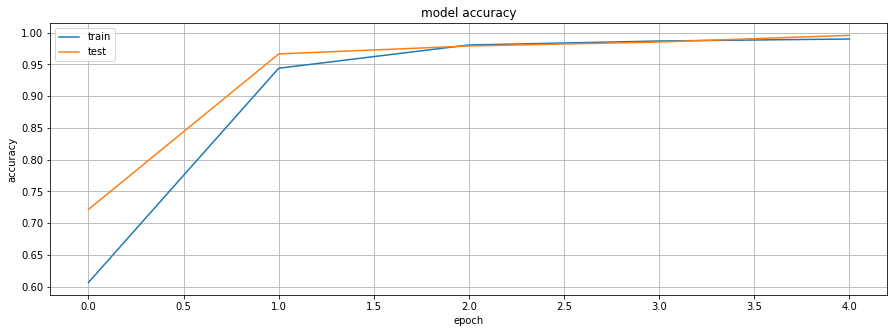

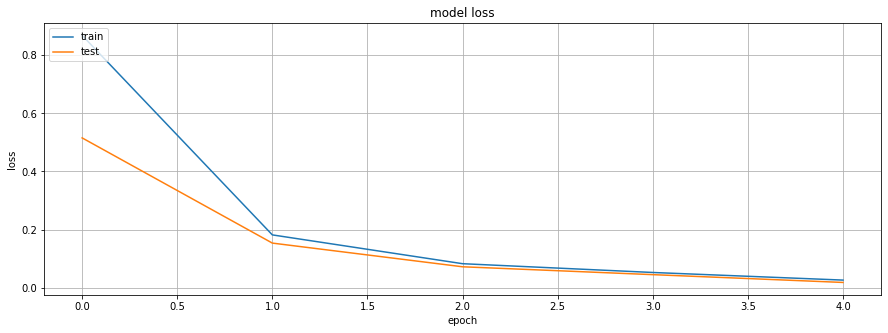

In [96]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid()
plt.show()

# Testing the model with completely diff data

In [156]:
test_df_1 = pd.read_csv("E:\Project\Human Identity\Data\Accelerometer_User_1_37122.csv")
test_df_1

,ID,TIMESTAMP,X,Y,Z
0,1.598620e+12,0,-0.081100,3.939774,8.173904
1,1.598620e+12,1,0.244324,3.872772,9.477982
2,1.598620e+12,2,0.430969,3.824921,9.401413
3,1.598620e+12,3,0.167755,3.925415,8.863037
4,1.598620e+12,4,0.411819,4.444656,8.685959
...,...,...,...,...,...
37118,1.598620e+12,37118,0.789886,-0.178268,9.212387
37119,1.598620e+12,37119,0.665466,0.132797,9.437317
37120,1.598620e+12,37120,0.246719,0.678360,10.528442
37121,1.598620e+12,37121,0.325684,0.568283,10.186264


In [157]:
test_df_1 = test_df_1.iloc[:N_test]

In [158]:
test_df_2 = pd.read_csv("E:\Project\Human Identity\Data\Accelerometer_User_2_34809.csv")
test_df_2

,ID,TIMESTAMP,X,Y,Z
0,1.599400e+12,0,-4.261679,4.070143,9.988609
1,1.599400e+12,1,-4.261679,4.070143,9.988609
2,1.599400e+12,2,-2.614468,4.314352,10.357317
3,1.599400e+12,3,-2.614468,4.314352,10.357317
4,1.599400e+12,4,-2.327164,4.999093,6.311116
...,...,...,...,...,...
34805,1.599400e+12,34805,-0.421380,4.797980,8.920795
34806,1.599400e+12,34806,-0.421380,4.797980,8.920795
34807,1.599400e+12,34807,-0.478840,4.826711,7.800309
34808,1.599400e+12,34808,-0.478840,4.826711,7.800309


In [159]:
test_df_2 = test_df_2.iloc[:N_test]

In [160]:
test_df_3 = pd.read_csv("E:\Project\Human Identity\Data\Accelerometer_User_3_115714.csv")
test_df_3

,ID,TIMESTAMP,X,Y,Z
0,1.599530e+12,0,-0.837631,3.755676,9.899612
1,1.599530e+12,1,-0.447601,3.602539,6.968414
2,1.599530e+12,2,0.002243,3.006714,7.171799
3,1.599530e+12,3,0.942627,1.956268,9.042984
4,1.599530e+12,4,1.172333,1.513596,10.497818
...,...,...,...,...,...
115710,1.599530e+12,115710,-0.411713,3.327362,10.701218
115711,1.599530e+12,115711,0.071640,2.848785,10.859146
115712,1.599530e+12,115712,-0.270538,3.009110,9.815872
115713,1.599530e+12,115713,-0.375824,3.064148,9.191345


In [161]:
test_df_3 = test_df_3.iloc[N_test:2*N_test]
test_df_3 = test_df_3.reset_index(drop=True)

In [162]:
test_df_4 = pd.read_csv("E:\Project\Human Identity\Data\Accelerometer_User_4_85857.csv")
test_df_4

,ID,TIMESTAMP,X,Y,Z
0,1.600260e+12,0,-1.674713,1.879562,9.676590
1,1.600260e+12,1,-1.988174,1.965698,9.573700
2,1.600260e+12,2,-1.595764,1.941772,9.829727
3,1.600260e+12,3,-1.346909,2.006378,10.126450
4,1.600260e+12,4,-1.468933,1.972885,9.987656
...,...,...,...,...,...
85853,1.600260e+12,85853,-0.507019,-10.766510,0.502518
85854,1.600260e+12,85854,-0.672134,-10.922043,0.294342
85855,1.600260e+12,85855,-1.043014,-10.534409,-0.014343
85856,1.600260e+12,85856,-1.169830,-10.441086,0.179474


In [163]:
test_df_4 = test_df_4.iloc[N_test:2*N_test]
test_df_4 = test_df_4.reset_index(drop=True)

In [164]:
test_df_5 = pd.read_csv("E:\Project\Human Identity\Data\Accelerometer_User_5_63235.csv")
test_df_5

,ID,TIMESTAMP,X,Y,Z,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1.600000e+12,0,-2.240973,10.381259,-2.331953,NaN,NaN,NaN
1,1.600000e+12,1,2.791639,14.355634,-2.681506,NaN,NaN,NaN
2,1.600000e+12,2,2.619257,11.396400,-2.877830,NaN,NaN,NaN
3,1.600000e+12,3,-1.168370,7.671022,-0.718260,NaN,NaN,NaN
4,1.600000e+12,4,-1.824382,6.143522,0.330400,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
63232,1.600000e+12,35988,1.910573,10.213664,0.320823,NaN,NaN,NaN
63233,1.600000e+12,35989,0.569820,10.371682,0.799663,NaN,NaN,NaN
63234,1.600000e+12,35990,0.565032,10.759542,0.349553,NaN,NaN,NaN
63235,1.600000e+12,35991,1.412579,11.458650,-0.296881,NaN,NaN,NaN


In [165]:
test_df_5 = test_df_5.iloc[N_test:2*N_test]
test_df_5 = test_df_5.reset_index(drop=True)

In [166]:
test_data_user_1 = create(test_df_1,225,10)

In [167]:
test_data_user_2 = create(test_df_2,225,10)

In [168]:
test_data_user_3 = create(test_df_3,225,10)

In [169]:
test_data_user_4 = create(test_df_4,225,10)

In [170]:
test_data_user_5 = create(test_df_5,225,10)

In [171]:
test_samples=len(test_data_user_1)

In [172]:
test_X = test_data_user_1+test_data_user_2+test_data_user_3+test_data_user_4+test_data_user_5
test_X = np.array(test_X)
test_X = test_X.reshape(test_X.shape[0],225,3,1)

In [173]:
test_y = []
for i in range(test_samples*no):
    if i < samples:
        test_y.append(0)
    elif i < test_samples*2 and i>=test_samples:
        test_y.append(1)
    elif i < test_samples*3 and i>=test_samples*2:
        test_y.append(2)
    elif i < test_samples*4 and i>=test_samples*3:
        test_y.append(3)
    else:
        test_y.append(4)
test_y = np.array(test_y)

In [174]:
from sklearn.utils import shuffle

In [175]:
test_X,test_y=shuffle(test_X,test_y)

## The score

In [176]:
clf.evaluate(test_X, test_y, verbose=0)

[2.8751993090438583, 0.85615695]

In [129]:
pred_y = clf.predict(test_X)

In [130]:
y_pred=[]
for i in range(samples*no):
     temp=np.array(pred_y[i])    
     maximum = np.where(temp==max(temp))
     y_pred.append(maximum[0]) 

In [131]:
from sklearn import metrics

In [132]:
metrics.confusion_matrix(Y,y_pred)

array([[ 94, 109, 111,  87,  77],
       [ 99,  97, 102, 105,  75],
       [ 91,  96, 104, 101,  86],
       [ 98,  98, 108, 105,  69],
       [ 92,  99, 111,  97,  79]], dtype=int64)

In [200]:
test_X.shape

(14890, 225, 3, 1)